In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

C:\Users\WELCOME\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\WELCOME\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


# Importing the Dataset

In [4]:
data = pd.read_csv('Market_Basket.csv', header = None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


# Exploration of dataset (EDA)

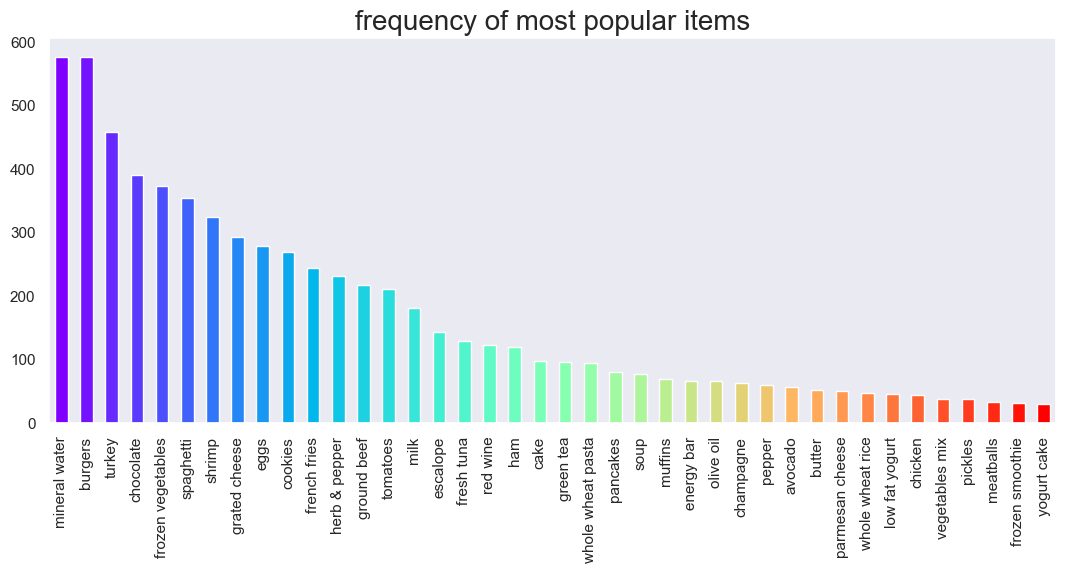

In [7]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [8]:
import networkx as nx
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

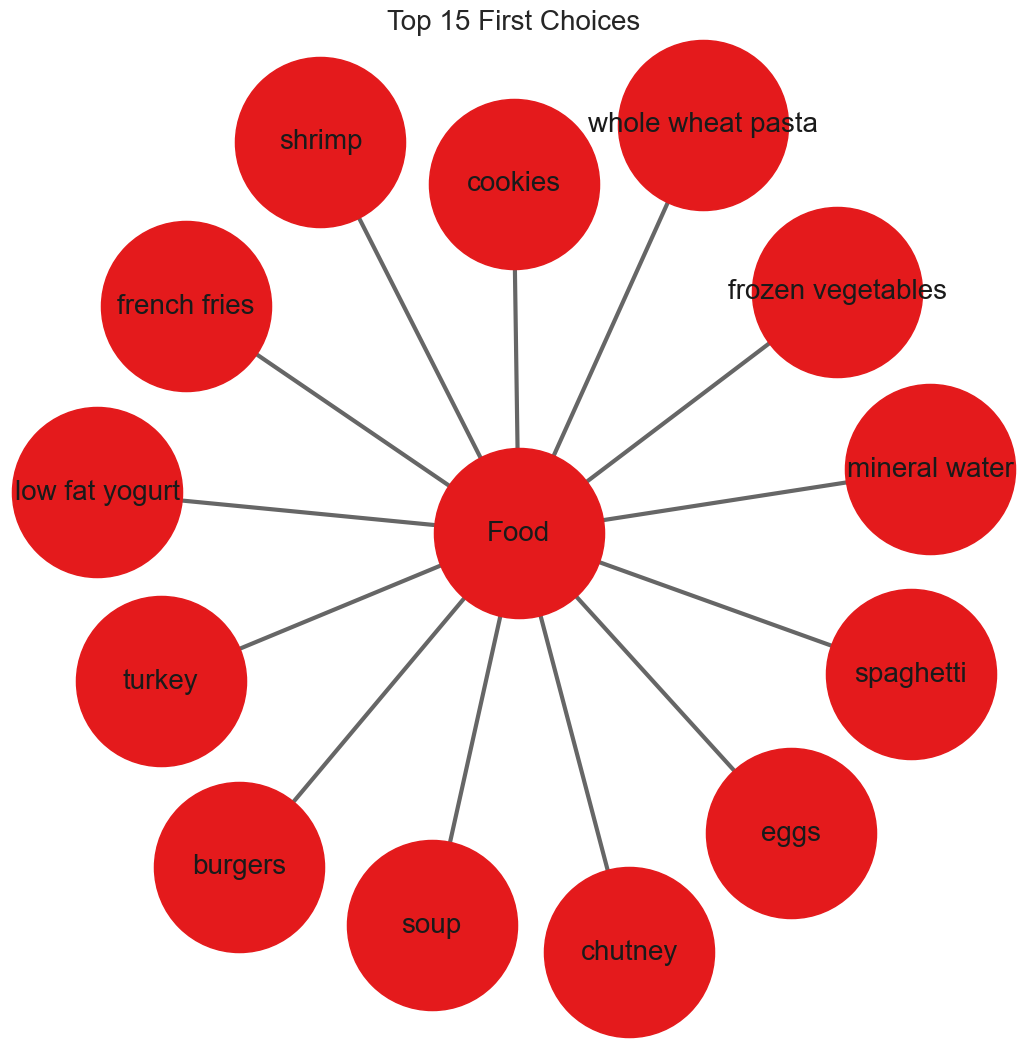

In [9]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

# Getting the list of transactions
Once we have read the dataset, we need to get the list of items in each transaction. SO we will run two loops here. One for the total number of transactions, and other for the total number of columns in each transaction. This list will work as a training set from where we can generate the list of association rules.

In [10]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

In [11]:
transactions[:1]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil',
  'Food']]

In [12]:
from itertools import permutations

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [13]:
print('# of items:',len(items))
print(list(items))

# of items: 122
['bramble', 'asparagus', 'magazines', 'cream', 'pancakes', 'cookies', 'red wine', 'salad', 'shrimp', 'frozen smoothie', 'pepper', 'fresh bread', 'butter', 'candy bars', 'bacon', 'cider', 'french wine', 'sandwich', 'chutney', 'hot dogs', 'muffins', 'babies food', 'strong cheese', 'rice', 'mushroom cream sauce', 'avocado', 'burger sauce', 'Food', 'chocolate bread', 'burgers', 'body spray', 'corn', 'oil', 'water spray', 'yams', 'honey', 'oatmeal', 'ham', 'green beans', 'cake', 'mint', 'olive oil', 'fresh tuna', 'shallot', 'green grapes', 'dessert wine', 'barbecue sauce', 'energy drink', 'eggplant', 'napkins', 'shampoo', 'salt', 'zucchini', 'turkey', 'spinach', 'cottage cheese', 'tomato sauce', 'chicken', 'grated cheese', 'ground beef', 'bug spray', 'pasta', 'hand protein bar', 'green tea', 'champagne', 'escalope', 'energy bar', 'strawberries', 'protein bar', 'cauliflower', 'frozen vegetables', 'pet food', 'black tea', 'gums', 'soup', 'herb & pepper', 'ketchup', 'whole weat

In [14]:
if 'nan' in items: items.remove('nan')
print(list(items))

['bramble', 'asparagus', 'magazines', 'cream', 'pancakes', 'cookies', 'red wine', 'salad', 'shrimp', 'frozen smoothie', 'pepper', 'fresh bread', 'butter', 'candy bars', 'bacon', 'cider', 'french wine', 'sandwich', 'chutney', 'hot dogs', 'muffins', 'babies food', 'strong cheese', 'rice', 'mushroom cream sauce', 'avocado', 'burger sauce', 'Food', 'chocolate bread', 'burgers', 'body spray', 'corn', 'oil', 'water spray', 'yams', 'honey', 'oatmeal', 'ham', 'green beans', 'cake', 'mint', 'olive oil', 'fresh tuna', 'shallot', 'green grapes', 'dessert wine', 'barbecue sauce', 'energy drink', 'eggplant', 'napkins', 'shampoo', 'salt', 'zucchini', 'turkey', 'spinach', 'cottage cheese', 'tomato sauce', 'chicken', 'grated cheese', 'ground beef', 'bug spray', 'pasta', 'hand protein bar', 'green tea', 'champagne', 'escalope', 'energy bar', 'strawberries', 'protein bar', 'cauliflower', 'frozen vegetables', 'pet food', 'black tea', 'gums', 'soup', 'herb & pepper', 'ketchup', 'whole weat flour', 'flax s

In [15]:
# Compute and print rules.
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of rules: 14520
[('bramble', 'asparagus'), ('bramble', 'magazines'), ('bramble', 'cream'), ('bramble', 'pancakes'), ('bramble', 'cookies')]


# One-hot encoding transaction data
Throughout we will use a common pipeline for preprocessing data for use in market basket analysis. The first step is to import a pandas DataFrame and select the column that contains transactions. Each transaction in the column will be a string that consists of a number of items, each separated by a comma. The next step is to use a lambda function to split each transaction string into a list, thereby transforming the column into a list of lists. Then we will transform the transactions into a one-hot encoded DataFrame, where each column consists of TRUE and FALSE values that indicate whether an item was included in a transaction.

In [16]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
onehot.head()

,asparagus,Food,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,...,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


# The simplest mertics
The support metric measures the share of transactions that contain itemset.
number of transactions with items(s) / number of transactions.

In [17]:
# Compute the support
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()

,support
Food,1.000000
mineral water,0.238368
eggs,0.179709
spaghetti,0.174110
french fries,0.170911


In [18]:
support.describe()

,support
count,121.000000
mean,0.040611
std,0.097542
min,0.000133
25%,0.007732
50%,0.015731
75%,0.042528
max,1.000000


# The confidence mertics
1. Can improve over support with additional metrics.
2. Adding confidence provides a more complete picture.
3. Confidence gives us the probability we will purchase  Y given we have purchased  X.
   SupportX&Y / SupportX
   


# The lift metric
    Lift provides another metric for evaluating the relationship between items.
    Numerator: Proportion of transactions that contain  X and  Y.
    Denominator: Proportion if  X and Y are assigned randomly and   independently to transactions.
    Support(X&Y) / Support(X)Support(Y)
 
    Lift  >1 tells us  2 items occur in transactions together more often than we would expect based on their individual support values. This means the relationship is unlikely to be explained by random chance. This natural threshold is convenient for filtering purposes.

    Lift  <1 tells us  2 items are paired together less frequently in transactions than we would expect if the pairings occurred by random chance.

## Recommending food wih support
A grocery-store wants to get members to eat more and has decided to use market basket analysis to figure out how. They approach you to do the analysis and ask that you use the five most highly-rated food items.

In [19]:
# Compute support for burgers and french fries
supportBF = np.logical_and(onehot['burgers'], onehot['french fries']).mean()

# Compute support for burgers and mineral water
supportBM = np.logical_and(onehot['burgers'], onehot['mineral water']).mean()

# Compute support for french fries and mineral water
supportFM = np.logical_and(onehot['french fries'], onehot['mineral water']).mean()

# Print support values
print("burgers and french fries: %.2f" % supportBF)
print("burgers and mineral water: %.2f" % supportBM)
print("french fries and mineral water: %.2f" % supportFM)

burgers and french fries: 0.02
burgers and mineral water: 0.02
french fries and mineral water: 0.03


# Computing the support metric
Previously we one-hot encoded a small grocery store's transactions as the DataFrame onehot. In this exercise, we'll make use of that DataFrame and the support metric to help the store's owner. First, she has asked us to identify frequently purchased items, which we'll do by computing support at the item-level. And second, she asked us to check whether the rule {mineral water} → {french fries} has a support of over  0.05.

In [20]:
# Add a mineral water+french fries column to the DataFrame onehot
onehot['mineral water+french fries'] = np.logical_and(onehot['mineral water'], onehot['french fries'])

# Compute the support
support = onehot.mean()
val = support.loc['mineral water+french fries']

# Print the support values
print(f'mineral water+french fries support = {val}')

mineral water+french fries support = 0.03372883615517931


# Refining support with confidence
After reporting your findings from the previous exercise, the store's owner asks us about the direction of the relationship. Should they use mineral water to promote french fries or french fries to promote mineral water?

We decide to compute the confidence metric, which has a direction, unlike support. We'll compute it for both {mineral water} → {french fries} and {french fries} → {mineral water}.



In [21]:
# Compute support for mineral water and french fries
supportMF = np.logical_and(onehot['mineral water'], onehot['french fries']).mean()

# Compute support for mineral water
supportM = onehot['mineral water'].mean()

# Compute support for french fries
supportF = onehot['french fries'].mean()

# Compute confidence for both rules
confidenceMM = supportMF / supportM
confidenceMF = supportMF / supportF

# Print results
print('mineral water = {0:.2f}, french fries = {1:.2f}'.format(confidenceMM, confidenceMF))

mineral water = 0.14, french fries = 0.20


Even though the support is identical for the two association rules, the confidence is much higher for french fries -> mineral water, since french fries has a higher support than mineral water.

# Further refinement with lift
Once again, we report our results to the store's owner: Use french fries to promote mineral water, since the rule has a higher confidence metric. The store's owner thanks us for the suggestion, but asks us to confirm that this is a meaningful relationship using another metric.

You recall that lift may be useful here. If lift is less than  1, this means that mineral water and french fries are paired together less frequently than we would expect if the pairings occurred by random chance.

In [22]:
# Compute lift
lift = supportMF / (supportM * supportF)

# Print lift
print("Lift: %.2f" % lift)

Lift: 0.83


# Leverage and Conviction


# The Leverage Conviction
Leverage also builds on support.
Leverage(X→Y)= Support(X&Y)−Support(X)Support(Y)
 
Leverage is similar to lift, but easier to interpret.
Leverage lies in  −1 and  +1 range.
Lift ranges from  0 to infinity.

# The Conviction metric
Conviction is also built using support.
More complicated and less intuitive than leverage.
Conviction(X→Y)= Support(X)Support(Y¯) / Support(X&Y¯)

In [23]:
# Compute support for burgers AND french fries
supportBF = np.logical_and(onehot['burgers'], onehot['french fries']).mean()

# Compute support for burgers
supportB = onehot['burgers'].mean()

# Compute support for NOT french fries
supportnF = 1.0 - onehot['french fries'].mean()

# Compute support for burgers and NOT french fries
supportBnF = supportB - supportBF

# Compute and print conviction for burgers -> french fries
conviction = supportB * supportnF / supportBnF
print("Conviction: %.2f" % conviction)

Conviction: 1.11


# Computing convicton with a functon
The store's owner asks us if we are able to compute conviction for every pair of food items in the grocery-store dataset, so she can use that information to decide which food items to locate closer together on the website.

We agree to take the job, but realize that we a need more efficient way to compute conviction, since we will need to compute it many times. We decide to write a function that computes it. It will take two columns of a pandas DataFrame as an input, one antecedent and one consequent, and output the conviction metric.

In [24]:
def conviction(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for NOT consequent
    supportnC = 1.0 - consequent.mean()

    # Compute support for antecedent and NOT consequent
    supportAnC = supportA - supportAC

    # Return conviction
    return supportA * supportnC / supportAnC

# Computing leverage with a function


In [25]:
def leverage(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAB = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for consequent
    supportB = consequent.mean()

    # Return leverage
    return supportAB - supportB * supportA

# Promoting food with conviction
Previously we defined a function to compute conviction. We were asked to apply that function to all two-food items permutations of the grocery-store dataset. We'll test the function by applying it to the three most popular food items, which we used in earlier exercises: burgers, french fries, and mineral water.

In [26]:
# Compute conviction for burgers -> french fries and french fries -> burgers
convictionBF = conviction(onehot['burgers'], onehot['french fries'])
convictionFB = conviction(onehot['french fries'], onehot['burgers'])

# Compute conviction for burgers -> mineral water and mineral water -> burgers
convictionBM = conviction(onehot['burgers'], onehot['mineral water'])
convictionMB = conviction(onehot['mineral water'], onehot['burgers'])

# Compute conviction for french fries -> mineral water and mineral water -> french fries
convictionFM = conviction(onehot['french fries'], onehot['mineral water'])
convictionMF = conviction(onehot['mineral water'], onehot['french fries'])

# Print results
print('french fries -> burgers: ', convictionFB)
print('burgers -> french fries: ', convictionBF)

french fries -> burgers:  1.0476495106531305
burgers -> french fries:  1.1088435652342468
